In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestRegressor  # Import Random Forest Regressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_log_error
import warnings

warnings.filterwarnings('ignore')

# Đọc dữ liệu từ tập tin CSV với các tùy chọn
df = pd.read_csv('D:/Năm 3-UIT/PHÂN TÍCH THỐNG KÊ/Lab/Final\DATA/CTG_Stock_Data.csv', header=0, parse_dates=[0], index_col=0)
df = df.dropna()  # Drop missing values

# In ra 5 dòng đầu tiên của DataFrame
print(df.head())
df = df.dropna()  # Drop missing values
df = df.reset_index(drop=True)  # Reset the index


<>:13: SyntaxWarning: invalid escape sequence '\D'
<>:13: SyntaxWarning: invalid escape sequence '\D'
C:\Users\minhd\AppData\Local\Temp\ipykernel_13420\2598489583.py:13: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('D:/Năm 3-UIT/PHÂN TÍCH THỐNG KÊ/Lab/Final\DATA/CTG_Stock_Data.csv', header=0, parse_dates=[0], index_col=0)


                    Open          High           Low         Close  \
Date                                                                 
2014-01-27  11717.867188  11856.540039  11648.531250  11717.867188   
2014-02-06  11648.531250  11717.867188  11509.858398  11648.531250   
2014-02-07  11579.194336  11717.867188  11509.858398  11579.194336   
2014-02-10  11509.858398  11648.531250  11440.521484  11509.858398   
2014-02-11  11579.194336  11717.867188  11440.521484  11509.858398   

               Adj Close     Volume  
Date                                 
2014-01-27  11717.867188   608510.0  
2014-02-06  11648.531250  1140509.0  
2014-02-07  11579.194336   826750.0  
2014-02-10  11509.858398  1639712.0  
2014-02-11  11509.858398  2082063.0  


In [2]:
# 2. chia train test validate theo tỉ lệ 9:1
# Split the data into training, testing
train_size = int(0.9 * len(df))
test_size = int(0.1 * len(df))

X2D = df[['High']]  # Biến độc lập theo mảng 2 chiều
Y2D = df[['Close']]  # Biến phụ thuộc theo mảng 2 chiều

In [3]:
y_train = Y2D[:train_size]
x_train = X2D[:train_size]
y_test = Y2D[train_size:]
x_test = X2D[train_size:]
y_train_index = y_train.index  # lấy ra index trước khi đổi nó về mảng 2 chiều ( phục vụ plot )
y_train = Y2D[:train_size].values.ravel()

# Tạo mô hình Random Forest
model = RandomForestRegressor()
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # Ví dụ các giá trị cho số cây trong rừng
    'max_depth': [None, 10, 20, 30],  # Ví dụ các giá trị cho độ sâu tối đa của mỗi cây
    'min_samples_split': [2, 5, 10],  # Ví dụ các giá trị cho số lượng mẫu tối thiểu để chia một nút
    'min_samples_leaf': [1, 2, 4]  # Ví dụ các giá trị cho số lượng mẫu tối thiểu ở lá
}

# Tạo đối tượng GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Huấn luyện mô hình sử dụng grid search
rf_model = grid_search.fit(x_train, y_train)

# In ra kết quả tốt nhất
print("Best parameters:", grid_search.best_params_)
print("Best score:", -grid_search.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best score: 2010806.6351315523


In [4]:
# dự đoán test
y_pred = rf_model.predict(x_test)
y_pred

array([24552.57459315, 24552.57459315, 24949.48977225, 24900.02675632,
       23678.18502643, 23404.50420926, 24057.01718735, 24324.24482127,
       24144.77847232, 24552.57459315, 25149.10014718, 25499.81922312,
       25819.44128476, 25765.7011597 , 25906.03928284, 25765.7011597 ,
       25906.03928284, 25906.03928284, 26446.69405753, 26983.14262491,
       27060.71637729, 27439.59104087, 27507.1297257 , 26715.00438482,
       26938.66595021, 26983.14262491, 25955.80470514, 25837.94314915,
       25961.34190606, 26699.03687179, 26699.03687179, 26699.03687179,
       26128.73810076, 25646.71175994, 25837.94314915, 25352.60335297,
       25920.56111339, 25961.34190606, 26938.66595021, 26938.66595021,
       25916.74378102, 25494.09921235, 25149.10014718, 24868.48507178,
       24552.57459315, 25037.71791243, 24883.64308417, 24552.57459315,
       25499.81922312, 25494.09921235, 25943.48216858, 25916.74378102,
       25819.44128476, 25837.94314915, 25819.44128476, 26289.68010929,
      

In [5]:
last_row = df.tail(1)
last_data = last_row['Close'].values.reshape(-1, 1)
last_data

array([[26750.]])

In [6]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = rf_model.predict(last_data)
    x_next_30_days.append(x_pred_next)
    last_data = x_pred_next.reshape(-1, 1)
x_next_30_days

[array([25961.34190606]),
 array([25494.09921235]),
 array([25025.89486005]),
 array([23788.65214849]),
 array([22729.12491044]),
 array([21997.89142494]),
 array([21809.89191067]),
 array([21421.49624344]),
 array([21024.63620433]),
 array([20657.77907751]),
 array([19747.11063762]),
 array([18986.98269784]),
 array([18656.7478561]),
 array([18517.0234949]),
 array([18108.52893414]),
 array([17956.05126278]),
 array([17667.76711951]),
 array([17305.86182792]),
 array([17028.58148835]),
 array([16530.22287899]),
 array([16270.96805618]),
 array([15827.58983987]),
 array([15621.7045306]),
 array([15354.47951156]),
 array([15155.11321913]),
 array([14907.74499867]),
 array([14697.01356802]),
 array([14485.39810511]),
 array([14308.43211812]),
 array([14148.23505345])]

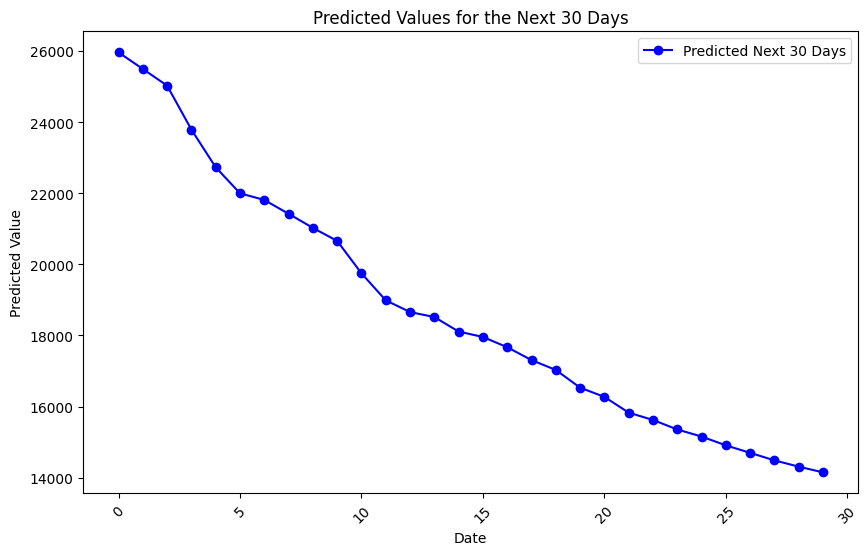

In [7]:
# Vẽ biểu đồ
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(x_next_30_days, marker='o', color='b', label='Predicted Next 30 Days')

# Đặt tiêu đề và nhãn
plt.title('Predicted Values for the Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Predicted Value')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()

# Hiển thị biểu đồ
plt.show()

In [8]:
# Chuyển cột predict price thành mảng 2 chiều
y_pred = y_pred.reshape(-1, 1)

In [9]:
# 7. Đánh giá độ chính xác test bằng RMSE, MSLE , MAPE
# RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test) ** 2))
print('Testing RMSE:', test_rmse)
# MAPE
test_mape = mean_absolute_percentage_error(y_test, y_pred)
print('Testing MAPE:', test_mape)
# MSLE
test_msle = mean_squared_log_error(y_test, y_pred)
print('Testing MSLE:', test_msle)

Testing RMSE: 330.584294708674
Testing MAPE: 0.009552075159954957
Testing MSLE: 0.00015786563067069146


In [10]:
# Tạo index cho 30 ngày tiếp theo
last_index = df.index[-1]
next_30_dates = pd.RangeIndex(start=last_index, stop=last_index + 30, step=1)

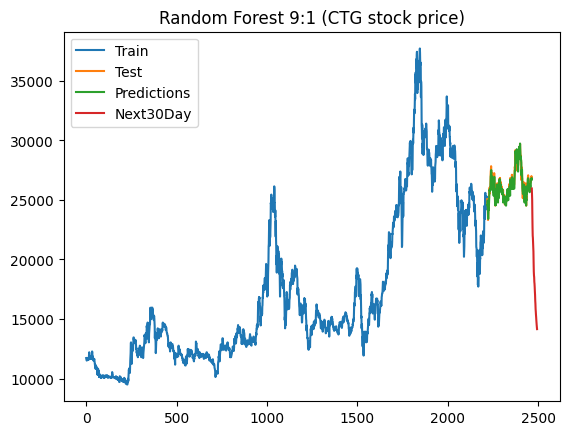

In [11]:
# 9.Vẽ hình
plt.plot(y_train_index, y_train)
plt.plot(y_test.index, y_test)
plt.plot(y_test.index, y_pred)
plt.plot(next_30_dates, x_next_30_days)
plt.legend(['Train', 'Test', 'Predictions', 'Next30Day'])
plt.title('Random Forest 9:1 (CTG stock price)')
plt.show()